In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import glob
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
from ipywidgets import IntProgress

In [3]:
pngs = glob.glob('sd02/sd02/data/*/*/*.png')
pngs.extend(glob.glob('sd06/sd06/data/*/*/*.png'))
tags = [open(png[:-4] + '.fmt').readline().strip() for png in pngs]
len(pngs), len(tags)

(11185, 11185)

In [4]:
df = pd.DataFrame(dict(fname=pngs, label=tags))
df.head()

,fname,label
0,sd02/sd02/data\sfrs_0\r0000\r0000_00.png,1040_1
1,sd02/sd02/data\sfrs_0\r0000\r0000_01.png,1040_2
2,sd02/sd02/data\sfrs_0\r0000\r0000_02.png,sch_a
3,sd02/sd02/data\sfrs_0\r0000\r0000_03.png,4562_1
4,sd02/sd02/data\sfrs_0\r0000\r0000_04.png,4562_2


In [5]:
df['label'].value_counts(normalize=True)

1040_2      0.160930
1040_1      0.160930
sch_b       0.101743
sch_a       0.087528
sch_e_1     0.060796
sch_e_2     0.060438
4562_2      0.048637
4562_1      0.045418
sch_d_2     0.042825
sch_d_1     0.041842
sch_c_1     0.035315
sch_se_1    0.023782
sch_se_2    0.019759
2441        0.017970
6251        0.017613
sch_c_2     0.016987
2106_1      0.016451
sch_f_1     0.015825
2106_2      0.014215
sch_f_2     0.010997
Name: label, dtype: float64

In [6]:
img_size = 224
bs = 64

In [7]:
data = ImageDataBunch.from_df('.', df, fn_col='fname', label_col='label', \
                              ds_tfms=get_transforms(), size=img_size, bs=bs).normalize(imagenet_stats)

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [9]:
learn.lr_find()


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


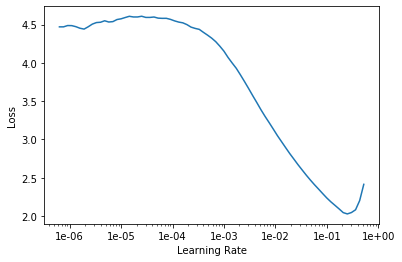

In [10]:
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(4, max_lr=0.01)

epoch,train_loss,valid_loss,error_rate,time
0,0.121842,0.000165,0.000000,2:57:36
1,0.027151,0.000046,0.000000,2:37:53
2,0.010203,0.000035,0.000000,2:46:51
3,0.001543,0.000000,0.000000,3:22:42


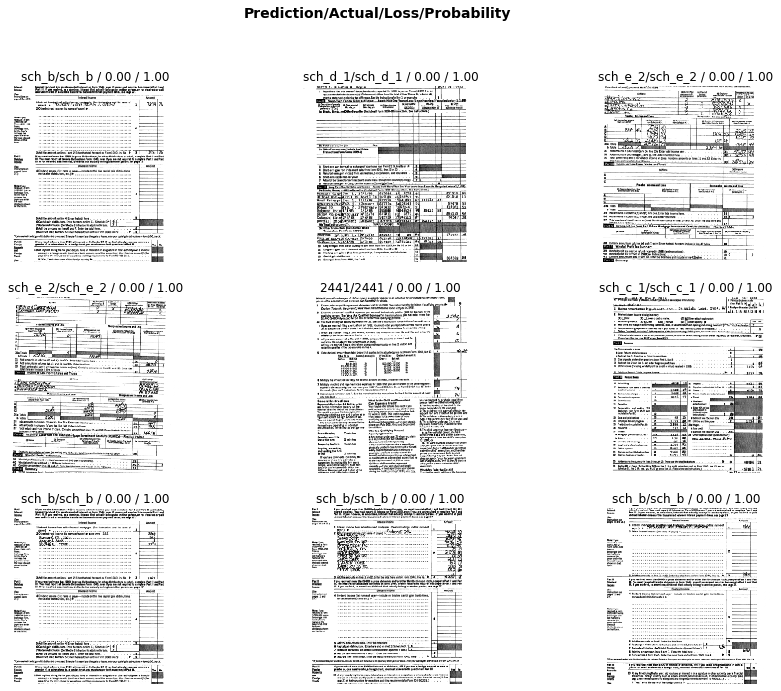

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
from google_images_download import google_images_download